## 📚 Kütüphaneleri İçe Aktarma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('✅ Kütüphaneler yüklendi')
print(f'Pandas: {pd.__version__}')
print(f'NumPy: {np.__version__}')

✅ Kütüphaneler yüklendi
Pandas: 2.1.4
NumPy: 1.26.4


## 📂 Veri Yükleme

In [2]:
# Temizlenmiş veriyi yükle
df = pd.read_csv('../data/processed/cleaned_data.csv')
df['capture_date'] = pd.to_datetime(df['capture_date'])

print(f'✅ Veri yüklendi: {df.shape[0]:,} satır, {df.shape[1]} sütun')
print(f'\n📊 İlk 3 kayıt:')
df.head(3)

✅ Veri yüklendi: 44,495 satır, 17 sütun

📊 İlk 3 kayıt:


,product_name,supermarket_name,category_name,price_gbp,price_unit_gbp,unit,price_category,capture_date,year,month,month_name,day,day_of_week,day_name,week,is_weekend,is_own_brand
0,19 Crimes Chardonnay,Morrisons,drinks,9.0,11.97,l,Pahalı,2024-03-22,2024,3,March,22,4,Friday,12,0,False
1,19 Crimes Chardonnay,Morrisons,drinks,9.0,11.97,l,Pahalı,2024-04-06,2024,4,April,6,5,Saturday,14,1,False
2,19 Crimes Chardonnay,Morrisons,drinks,9.0,11.97,l,Pahalı,2024-04-04,2024,4,April,4,3,Thursday,14,0,False


In [3]:
# Veri tiplerini kontrol et
print('📋 Sütun Tipleri:\n')
df.dtypes

📋 Sütun Tipleri:



product_name                object
supermarket_name            object
category_name               object
price_gbp                  float64
price_unit_gbp             float64
unit                        object
price_category              object
capture_date        datetime64[ns]
year                         int64
month                        int64
month_name                  object
day                          int64
day_of_week                  int64
day_name                    object
week                         int64
is_weekend                   int64
is_own_brand                  bool
dtype: object

---
## 🔢 PART 1: Kategorik Değişken Dönüşümü (Encoding)

### 1.1 One-Hot Encoding - Supermarket Name

In [4]:
# Süpermarket isimlerini one-hot encoding ile dönüştür
supermarket_dummies = pd.get_dummies(df['supermarket_name'], prefix='supermarket', dtype=int)

print('✅ Supermarket One-Hot Encoding tamamlandı')
print(f'\n📊 Oluşturulan sütunlar: {list(supermarket_dummies.columns)}')
print(f'\n🔢 İlk 5 kayıt:')
supermarket_dummies.head()

✅ Supermarket One-Hot Encoding tamamlandı

📊 Oluşturulan sütunlar: ['supermarket_ASDA', 'supermarket_Aldi', 'supermarket_Morrisons', 'supermarket_Sains', 'supermarket_Tesco']

🔢 İlk 5 kayıt:


,supermarket_ASDA,supermarket_Aldi,supermarket_Morrisons,supermarket_Sains,supermarket_Tesco
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


### 1.2 One-Hot Encoding - Category Name

In [5]:
# Kategori isimlerini one-hot encoding ile dönüştür
category_dummies = pd.get_dummies(df['category_name'], prefix='category', dtype=int)

print('✅ Category One-Hot Encoding tamamlandı')
print(f'\n📊 Oluşturulan sütunlar: {list(category_dummies.columns)}')
print(f'\n🔢 İlk 5 kayıt:')
category_dummies.head()

✅ Category One-Hot Encoding tamamlandı

📊 Oluşturulan sütunlar: ['category_baby_products', 'category_bakery', 'category_drinks', 'category_food_cupboard', 'category_free-from', 'category_fresh_food', 'category_frozen', 'category_health_products', 'category_home', 'category_household', 'category_pets']

🔢 İlk 5 kayıt:


,category_baby_products,category_bakery,category_drinks,category_food_cupboard,category_free-from,category_fresh_food,category_frozen,category_health_products,category_home,category_household,category_pets
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### 1.3 Label Encoding - Unit

In [6]:
# Unit'i label encoding ile dönüştür (kg=0, l=1, unit=2)
le_unit = LabelEncoder()
df['unit_encoded'] = le_unit.fit_transform(df['unit'])

print('✅ Unit Label Encoding tamamlandı')
print(f'\n📊 Eşleştirme:')
for i, unit in enumerate(le_unit.classes_):
    print(f'   {unit} → {i}')

print(f'\n🔢 Örnek dönüşüm:')
df[['unit', 'unit_encoded']].head(10)

✅ Unit Label Encoding tamamlandı

📊 Eşleştirme:
   kg → 0
   l → 1
   unit → 2

🔢 Örnek dönüşüm:


,unit,unit_encoded
0,l,1
1,l,1
2,l,1
3,l,1
4,l,1
5,l,1
6,l,1
7,l,1
8,l,1
9,l,1


### 1.4 Price Category Label Encoding

In [7]:
# Fiyat kategorisini label encoding ile dönüştür
le_price_cat = LabelEncoder()
df['price_category_encoded'] = le_price_cat.fit_transform(df['price_category'])

print('✅ Price Category Label Encoding tamamlandı')
print(f'\n📊 Eşleştirme:')
for i, cat in enumerate(le_price_cat.classes_):
    print(f'   {cat} → {i}')

print(f'\n🔢 Örnek dönüşüm:')
df[['price_category', 'price_category_encoded']].value_counts().sort_index()

✅ Price Category Label Encoding tamamlandı

📊 Eşleştirme:
   Orta → 0
   Pahalı → 1
   Ucuz → 2

🔢 Örnek dönüşüm:


price_category  price_category_encoded
Orta            0                         15309
Pahalı          1                         14285
Ucuz            2                         14901
Name: count, dtype: int64

---
## 🆕 PART 2: Yeni Özellik Türetme (Feature Creation)

### 2.1 Fiyat Oranı Özellikleri

In [8]:
# 1. Toplam fiyat / Birim fiyat oranı
df['price_to_unit_ratio'] = df['price_gbp'] / (df['price_unit_gbp'] + 0.01)  # 0'a bölme hatası için +0.01

# 2. Fiyatın kategori ortalamasına göre yüzdesi
category_avg_price = df.groupby('category_name')['price_gbp'].transform('mean')
df['price_vs_category_avg'] = (df['price_gbp'] / category_avg_price) * 100

# 3. Fiyatın süpermarket ortalamasına göre yüzdesi
supermarket_avg_price = df.groupby('supermarket_name')['price_gbp'].transform('mean')
df['price_vs_supermarket_avg'] = (df['price_gbp'] / supermarket_avg_price) * 100

print('✅ Fiyat oranı özellikleri oluşturuldu')
print(f'\n📊 Özet istatistikler:')
df[['price_to_unit_ratio', 'price_vs_category_avg', 'price_vs_supermarket_avg']].describe()

✅ Fiyat oranı özellikleri oluşturuldu

📊 Özet istatistikler:


,price_to_unit_ratio,price_vs_category_avg,price_vs_supermarket_avg
count,44495.000000,44495.000000,44495.000000
mean,10.026290,100.000000,100.000000
std,58.281803,110.183277,154.638465
min,0.000900,2.248140,4.568904
25%,0.299882,51.140493,30.459362
50%,0.997151,76.387507,53.303884
75%,2.990033,115.066109,105.864206
max,1136.363636,2045.619710,2527.123786


### 2.2 Zaman Bazlı Özellikler

In [9]:
# Ay başı/sonu bilgisi
df['is_month_start'] = (df['day'] <= 7).astype(int)
df['is_month_end'] = (df['day'] >= 24).astype(int)

# Sezon bilgisi (UK için: 1-3 Kış, 4-6 İlkbahar, 7-9 Yaz, 10-12 Sonbahar)
df['season'] = df['month'].map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring'})
df['season_encoded'] = df['season'].map({'Winter': 0, 'Spring': 1})

print('✅ Zaman bazlı özellikler oluşturuldu')
print(f'\n📊 Dağılımlar:')
print(f'\nAy başı (1-7 gün): {df["is_month_start"].sum():,} kayıt')
print(f'Ay sonu (24+ gün): {df["is_month_end"].sum():,} kayıt')
print(f'\n🌱 Sezon dağılımı:')
print(df['season'].value_counts())

✅ Zaman bazlı özellikler oluşturuldu

📊 Dağılımlar:

Ay başı (1-7 gün): 9,069 kayıt
Ay sonu (24+ gün): 10,717 kayıt

🌱 Sezon dağılımı:
season
Winter    23868
Spring    20627
Name: count, dtype: int64


### 2.3 Kategori ve Süpermarket Etkileşim Özellikleri

In [10]:
# Premium kategoriler (ortalama fiyatı >£8 olan kategoriler)
premium_categories = ['home', 'drinks', 'health_products']
df['is_premium_category'] = df['category_name'].isin(premium_categories).astype(int)

# Discount süpermarketler
discount_supermarkets = ['Aldi', 'ASDA']
df['is_discount_supermarket'] = df['supermarket_name'].isin(discount_supermarkets).astype(int)

# Premium kategori x Premium süpermarket etkileşimi
df['premium_category_x_premium_supermarket'] = df['is_premium_category'] * (1 - df['is_discount_supermarket'])

print('✅ Etkileşim özellikleri oluşturuldu')
print(f'\n📊 Premium kategori ürün sayısı: {df["is_premium_category"].sum():,}')
print(f'📊 Discount süpermarket ürün sayısı: {df["is_discount_supermarket"].sum():,}')
print(f'📊 Premium x Premium etkileşim: {df["premium_category_x_premium_supermarket"].sum():,}')

✅ Etkileşim özellikleri oluşturuldu

📊 Premium kategori ürün sayısı: 21,476
📊 Discount süpermarket ürün sayısı: 17,494
📊 Premium x Premium etkileşim: 13,459


---
## 📊 PART 3: Feature Engineering Dataframe Oluşturma

In [11]:
# Tüm özellikleri birleştir
df_engineered = pd.concat([
    df[['product_name', 'price_gbp', 'price_unit_gbp', 'capture_date']],  # Orijinal veriler
    supermarket_dummies,  # One-hot encoded supermarkets
    category_dummies,     # One-hot encoded categories
    df[['unit_encoded', 'price_category_encoded', 'is_own_brand']],  # Label encoded
    df[['month', 'day', 'day_of_week', 'week', 'is_weekend']],  # Zaman özellikleri
    df[['price_to_unit_ratio', 'price_vs_category_avg', 'price_vs_supermarket_avg']],  # Fiyat oranları
    df[['is_month_start', 'is_month_end', 'season_encoded']],  # Yeni zaman özellikleri
    df[['is_premium_category', 'is_discount_supermarket', 'premium_category_x_premium_supermarket']]  # Etkileşimler
], axis=1)

print('✅ Feature Engineering DataFrame oluşturuldu')
print(f'\n📊 Boyut: {df_engineered.shape[0]:,} satır x {df_engineered.shape[1]} sütun')
print(f'\n🔢 İlk 5 kayıt:')
df_engineered.head()

✅ Feature Engineering DataFrame oluşturuldu

📊 Boyut: 44,495 satır x 37 sütun

🔢 İlk 5 kayıt:


,product_name,price_gbp,price_unit_gbp,capture_date,supermarket_ASDA,supermarket_Aldi,supermarket_Morrisons,supermarket_Sains,supermarket_Tesco,category_baby_products,...,is_weekend,price_to_unit_ratio,price_vs_category_avg,price_vs_supermarket_avg,is_month_start,is_month_end,season_encoded,is_premium_category,is_discount_supermarket,premium_category_x_premium_supermarket
0,19 Crimes Chardonnay,9.0,11.97,2024-03-22,0,0,1,0,0,0,...,0,0.751252,79.62813,137.067130,0,0,1,1,0,1
1,19 Crimes Chardonnay,9.0,11.97,2024-04-06,0,0,1,0,0,0,...,1,0.751252,79.62813,137.067130,1,0,1,1,0,1
2,19 Crimes Chardonnay,9.0,11.97,2024-04-04,0,0,1,0,0,0,...,0,0.751252,79.62813,137.067130,1,0,1,1,0,1
3,19 Crimes Chardonnay,8.0,10.64,2024-02-24,0,0,1,0,0,0,...,1,0.751174,70.78056,121.837449,0,1,0,1,0,1
4,19 Crimes Chardonnay,8.0,10.64,2024-02-22,0,0,1,0,0,0,...,0,0.751174,70.78056,121.837449,0,0,0,1,0,1


In [12]:
# Sütun isimlerini kontrol et
print('📋 Tüm Sütunlar:\n')
for i, col in enumerate(df_engineered.columns, 1):
    print(f'{i:2}. {col}')

📋 Tüm Sütunlar:

 1. product_name
 2. price_gbp
 3. price_unit_gbp
 4. capture_date
 5. supermarket_ASDA
 6. supermarket_Aldi
 7. supermarket_Morrisons
 8. supermarket_Sains
 9. supermarket_Tesco
10. category_baby_products
11. category_bakery
12. category_drinks
13. category_food_cupboard
14. category_free-from
15. category_fresh_food
16. category_frozen
17. category_health_products
18. category_home
19. category_household
20. category_pets
21. unit_encoded
22. price_category_encoded
23. is_own_brand
24. month
25. day
26. day_of_week
27. week
28. is_weekend
29. price_to_unit_ratio
30. price_vs_category_avg
31. price_vs_supermarket_avg
32. is_month_start
33. is_month_end
34. season_encoded
35. is_premium_category
36. is_discount_supermarket
37. premium_category_x_premium_supermarket


---
## ⚖️ PART 4: Feature Scaling (Ölçeklendirme)

### 4.1 Ölçeklendirilecek Özellikleri Belirleme

In [13]:
# Ölçeklendirilecek sürekli değişkenler
features_to_scale = [
    'price_gbp',
    'price_unit_gbp',
    'price_to_unit_ratio',
    'price_vs_category_avg',
    'price_vs_supermarket_avg',
    'month',
    'day',
    'day_of_week',
    'week'
]

print('📊 Ölçeklendirme öncesi istatistikler:\n')
df_engineered[features_to_scale].describe()

📊 Ölçeklendirme öncesi istatistikler:



,price_gbp,price_unit_gbp,price_to_unit_ratio,price_vs_category_avg,price_vs_supermarket_avg,month,day,day_of_week,week
count,44495.000000,44495.000000,44495.000000,44495.000000,44495.000000,44495.000000,44495.000000,44495.000000,44495.000000
mean,6.579929,22.848979,10.026290,100.000000,100.000000,2.376604,15.717339,2.934847,8.647151
std,10.190719,112.985686,58.281803,110.183277,154.638465,0.993418,8.529403,1.994599,3.951930
min,0.300000,0.001000,0.000900,2.248140,4.568904,1.000000,1.000000,0.000000,2.000000
25%,2.000000,1.070000,0.299882,51.140493,30.459362,2.000000,9.000000,1.000000,5.000000
50%,3.500000,4.200000,0.997151,76.387507,53.303884,2.000000,15.000000,3.000000,9.000000
75%,7.000000,12.000000,2.990033,115.066109,105.864206,3.000000,23.000000,5.000000,12.000000
max,160.000000,7755.600000,1136.363636,2045.619710,2527.123786,4.000000,31.000000,6.000000,15.000000


### 4.2 StandardScaler ile Ölçeklendirme

In [14]:
# StandardScaler oluştur ve uygula
scaler = StandardScaler()
df_engineered[features_to_scale] = scaler.fit_transform(df_engineered[features_to_scale])

print('✅ StandardScaler uygulandı')
print(f'\n📊 Ölçeklendirme sonrası istatistikler:\n')
df_engineered[features_to_scale].describe()

✅ StandardScaler uygulandı

📊 Ölçeklendirme sonrası istatistikler:



,price_gbp,price_unit_gbp,price_to_unit_ratio,price_vs_category_avg,price_vs_supermarket_avg,month,day,day_of_week,week
count,4.449500e+04,4.449500e+04,4.449500e+04,4.449500e+04,4.449500e+04,4.449500e+04,4.449500e+04,4.449500e+04,4.449500e+04
mean,-5.621104e-17,-1.533028e-17,-2.235667e-18,-1.533028e-17,2.810552e-17,5.493352e-17,8.032431e-17,-2.395357e-18,8.367781e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-6.162469e-01,-2.022224e-01,-1.720177e-01,-8.871851e-01,-6.171309e-01,-1.385740e+00,-1.725502e+00,-1.471413e+00,-1.682020e+00
25%,-4.494266e-01,-1.927609e-01,-1.668877e-01,-4.434435e-01,-4.497032e-01,-3.791034e-01,-7.875598e-01,-9.700536e-01,-9.228889e-01
50%,-3.022322e-01,-1.650580e-01,-1.549238e-01,-2.143044e-01,-3.019730e-01,-3.791034e-01,-8.410285e-02,3.266527e-02,8.928614e-02
75%,4.122145e-02,-9.602191e-02,-1.207295e-01,1.367383e-01,3.792246e-02,6.275331e-01,8.538397e-01,1.035384e+00,8.484174e-01
max,1.505505e+01,6.844086e+01,1.932593e+01,1.765823e+01,1.569565e+01,1.634170e+00,1.791782e+00,1.536744e+00,1.607549e+00


### 4.3 Ölçeklendirme Görselleştirmesi

💾 Grafik kaydedildi: 21_scaling_comparison.png


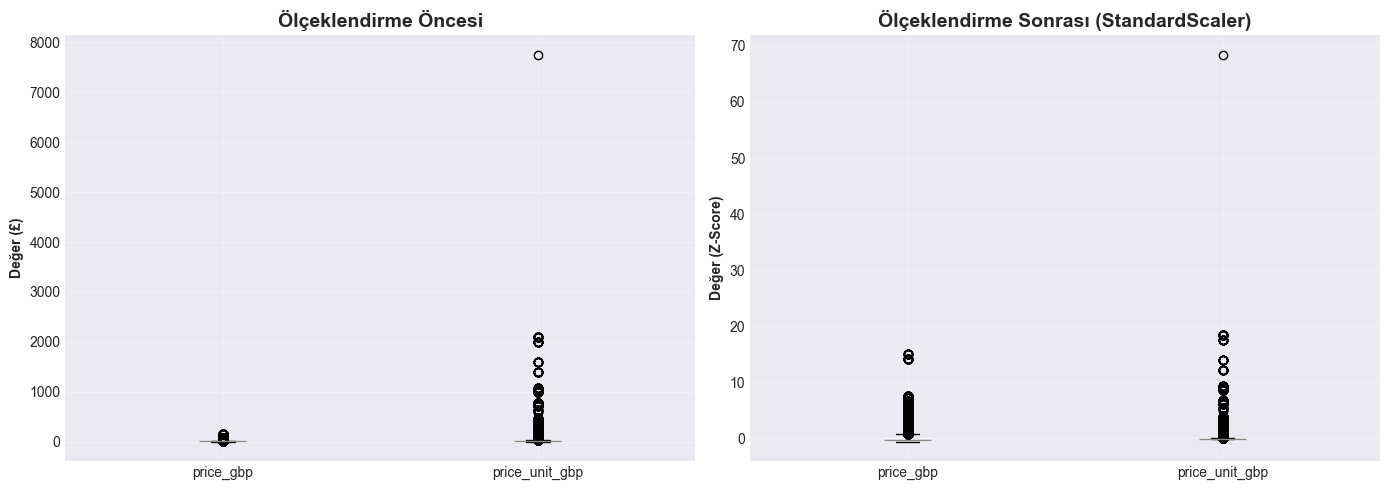

In [15]:
# Ölçeklendirme öncesi ve sonrası karşılaştırma
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Önceki veri (orijinal)
df[['price_gbp', 'price_unit_gbp']].boxplot(ax=axes[0])
axes[0].set_title('Ölçeklendirme Öncesi', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Değer (£)', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Ölçeklendirilmiş veri
df_engineered[['price_gbp', 'price_unit_gbp']].boxplot(ax=axes[1])
axes[1].set_title('Ölçeklendirme Sonrası (StandardScaler)', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Değer (Z-Score)', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/21_scaling_comparison.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 21_scaling_comparison.png')
plt.show()

---
## 🎯 PART 5: Train-Test Split Hazırlığı

### 5.1 Feature (X) ve Target (y) Ayırma

In [16]:
# Target değişken: price_gbp (tahmin edeceğimiz değer)
y = df_engineered['price_gbp'].copy()

# Features: product_name ve capture_date hariç tüm sütunlar
X = df_engineered.drop(columns=['product_name', 'capture_date', 'price_gbp'])

print('✅ X (Features) ve y (Target) ayrıldı')
print(f'\n📊 X boyutu: {X.shape[0]:,} satır x {X.shape[1]} özellik')
print(f'📊 y boyutu: {y.shape[0]:,} satır')
print(f'\n🔢 Feature listesi:')
for i, col in enumerate(X.columns, 1):
    print(f'{i:2}. {col}')

✅ X (Features) ve y (Target) ayrıldı

📊 X boyutu: 44,495 satır x 34 özellik
📊 y boyutu: 44,495 satır

🔢 Feature listesi:
 1. price_unit_gbp
 2. supermarket_ASDA
 3. supermarket_Aldi
 4. supermarket_Morrisons
 5. supermarket_Sains
 6. supermarket_Tesco
 7. category_baby_products
 8. category_bakery
 9. category_drinks
10. category_food_cupboard
11. category_free-from
12. category_fresh_food
13. category_frozen
14. category_health_products
15. category_home
16. category_household
17. category_pets
18. unit_encoded
19. price_category_encoded
20. is_own_brand
21. month
22. day
23. day_of_week
24. week
25. is_weekend
26. price_to_unit_ratio
27. price_vs_category_avg
28. price_vs_supermarket_avg
29. is_month_start
30. is_month_end
31. season_encoded
32. is_premium_category
33. is_discount_supermarket
34. premium_category_x_premium_supermarket


### 5.2 Train-Test Split (%80 - %20)

In [17]:
# %80 train, %20 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

print('✅ Train-Test Split tamamlandı')
print(f'\n📊 Train Set:')
print(f'   X_train: {X_train.shape[0]:,} satır x {X_train.shape[1]} özellik')
print(f'   y_train: {y_train.shape[0]:,} satır')
print(f'\n📊 Test Set:')
print(f'   X_test: {X_test.shape[0]:,} satır x {X_test.shape[1]} özellik')
print(f'   y_test: {y_test.shape[0]:,} satır')
print(f'\n🎯 Split oranı: {X_train.shape[0]/X.shape[0]*100:.1f}% train, {X_test.shape[0]/X.shape[0]*100:.1f}% test')

✅ Train-Test Split tamamlandı

📊 Train Set:
   X_train: 35,596 satır x 34 özellik
   y_train: 35,596 satır

📊 Test Set:
   X_test: 8,899 satır x 34 özellik
   y_test: 8,899 satır

🎯 Split oranı: 80.0% train, 20.0% test


### 5.3 Target Değişken Dağılımı (Train vs Test)

💾 Grafik kaydedildi: 22_train_test_distribution.png


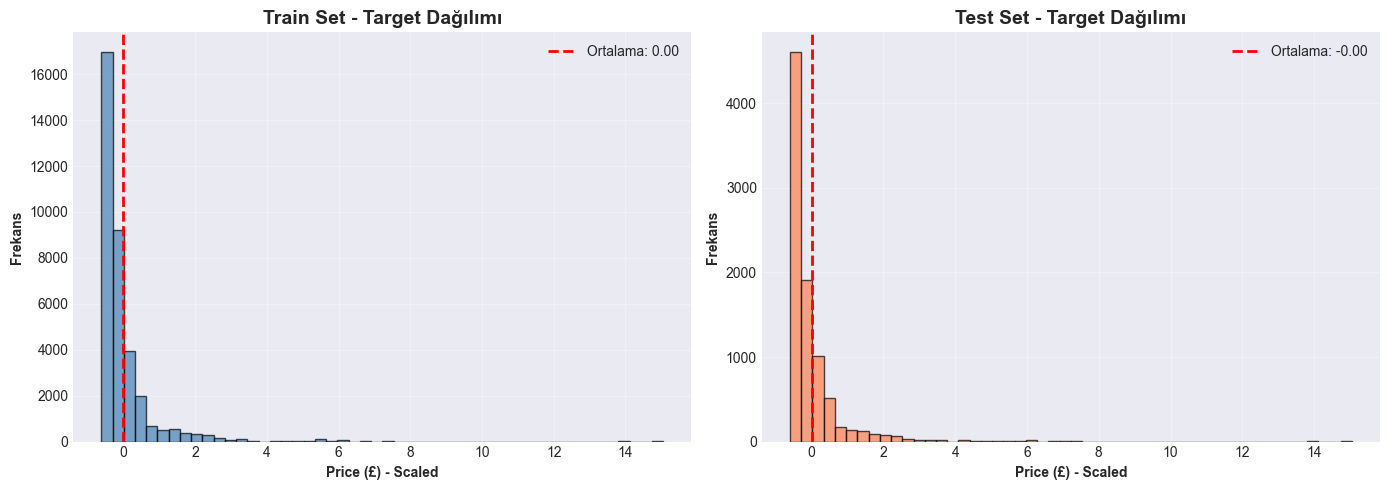

In [18]:
# Train ve Test setlerinde target dağılımını kontrol et
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train set
axes[0].hist(y_train, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(y_train.mean(), color='red', linestyle='--', linewidth=2, label=f'Ortalama: {y_train.mean():.2f}')
axes[0].set_title('Train Set - Target Dağılımı', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Price (£) - Scaled', fontweight='bold')
axes[0].set_ylabel('Frekans', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].hist(y_test, bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[1].axvline(y_test.mean(), color='red', linestyle='--', linewidth=2, label=f'Ortalama: {y_test.mean():.2f}')
axes[1].set_title('Test Set - Target Dağılımı', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Price (£) - Scaled', fontweight='bold')
axes[1].set_ylabel('Frekans', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/22_train_test_distribution.png', dpi=300, bbox_inches='tight')
print('💾 Grafik kaydedildi: 22_train_test_distribution.png')
plt.show()

---
## 💾 PART 6: İşlenmiş Veriyi Kaydetme

### 6.1 Engineered DataFrame'i Kaydetme

In [19]:
# Tam veri setini kaydet
output_path = '../data/processed/engineered_data.csv'
df_engineered.to_csv(output_path, index=False)

print(f'✅ Engineered data kaydedildi: {output_path}')
print(f'📊 Boyut: {df_engineered.shape[0]:,} satır x {df_engineered.shape[1]} sütun')

✅ Engineered data kaydedildi: ../data/processed/engineered_data.csv
📊 Boyut: 44,495 satır x 37 sütun


### 6.2 Train-Test Setlerini Kaydetme

In [20]:
# Train ve Test setlerini ayrı dosyalara kaydet
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False, header=['price_gbp'])
y_test.to_csv('../data/processed/y_test.csv', index=False, header=['price_gbp'])

print('✅ Train-Test setleri kaydedildi:')
print('   📄 X_train.csv')
print('   📄 X_test.csv')
print('   📄 y_train.csv')
print('   📄 y_test.csv')

✅ Train-Test setleri kaydedildi:
   📄 X_train.csv
   📄 X_test.csv
   📄 y_train.csv
   📄 y_test.csv


---
## 📊 PART 7: Feature Engineering Özet Raporu

In [21]:
print('='*70)
print('📊 FEATURE ENGINEERING - ÖZET RAPOR')
print('='*70)

print('\n1️⃣ ENCODING (KODLAMA):')
print(f'   • One-Hot Encoding: Supermarket ({len(supermarket_dummies.columns)} sütun)')
print(f'   • One-Hot Encoding: Category ({len(category_dummies.columns)} sütun)')
print(f'   • Label Encoding: Unit (3 değer → 0,1,2)')
print(f'   • Label Encoding: Price Category (3 değer → 0,1,2)')

print('\n2️⃣ YENİ ÖZELLİKLER:')
print(f'   • Fiyat Oranları: 3 özellik')
print(f'   • Zaman Bazlı: 3 özellik')
print(f'   • Etkileşim: 3 özellik')
print(f'   • TOPLAM: 9 yeni özellik')

print('\n3️⃣ SCALING (ÖLÇEKLENDİRME):')
print(f'   • StandardScaler uygulandı')
print(f'   • Ölçeklenen değişken sayısı: {len(features_to_scale)}')

print('\n4️⃣ TRAIN-TEST SPLIT:')
print(f'   • Train Set: {X_train.shape[0]:,} kayıt ({X_train.shape[0]/X.shape[0]*100:.1f}%)')
print(f'   • Test Set: {X_test.shape[0]:,} kayıt ({X_test.shape[0]/X.shape[0]*100:.1f}%)')
print(f'   • Toplam Feature: {X.shape[1]}')

print('\n5️⃣ KAYDEDILEN DOSYALAR:')
print(f'   ✅ engineered_data.csv ({df_engineered.shape[0]:,} x {df_engineered.shape[1]})')
print(f'   ✅ X_train.csv ({X_train.shape[0]:,} x {X_train.shape[1]})')
print(f'   ✅ X_test.csv ({X_test.shape[0]:,} x {X_test.shape[1]})')
print(f'   ✅ y_train.csv ({y_train.shape[0]:,} x 1)')
print(f'   ✅ y_test.csv ({y_test.shape[0]:,} x 1)')

print('\n' + '='*70)
print('✅ FEATURE ENGINEERING TAMAMLANDI!')
print('🎯 Sıradaki Adım: 04_linear_regression.ipynb')
print('='*70)

📊 FEATURE ENGINEERING - ÖZET RAPOR

1️⃣ ENCODING (KODLAMA):
   • One-Hot Encoding: Supermarket (5 sütun)
   • One-Hot Encoding: Category (11 sütun)
   • Label Encoding: Unit (3 değer → 0,1,2)
   • Label Encoding: Price Category (3 değer → 0,1,2)

2️⃣ YENİ ÖZELLİKLER:
   • Fiyat Oranları: 3 özellik
   • Zaman Bazlı: 3 özellik
   • Etkileşim: 3 özellik
   • TOPLAM: 9 yeni özellik

3️⃣ SCALING (ÖLÇEKLENDİRME):
   • StandardScaler uygulandı
   • Ölçeklenen değişken sayısı: 9

4️⃣ TRAIN-TEST SPLIT:
   • Train Set: 35,596 kayıt (80.0%)
   • Test Set: 8,899 kayıt (20.0%)
   • Toplam Feature: 34

5️⃣ KAYDEDILEN DOSYALAR:
   ✅ engineered_data.csv (44,495 x 37)
   ✅ X_train.csv (35,596 x 34)
   ✅ X_test.csv (8,899 x 34)
   ✅ y_train.csv (35,596 x 1)
   ✅ y_test.csv (8,899 x 1)

✅ FEATURE ENGINEERING TAMAMLANDI!
🎯 Sıradaki Adım: 04_linear_regression.ipynb
